In [1]:
#Importing the data and necassary packages
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("https://github.com/ArinB/MSBA-CA-03-Decision-Trees/blob/master/census_data.csv?raw=true")
df.head()

hours_per_week_bin occupation_bin  msr_bin capital_gl_bin race_sex_bin  \
0           b. 31-40   b. Mid - Low   b. Mid         c. > 0      c. High   
1            a. 0-30        e. High  c. High         a. = 0      c. High   
2           b. 31-40         a. Low   b. Mid         a. = 0      c. High   
3           b. 31-40         a. Low  c. High         a. = 0       b. Mid   
4           b. 31-40        e. High  c. High         a. = 0       a. Low   

  education_num_bin education_bin workclass_bin            age_bin   flag  y  
0             c. 13  c. Bachelors     b. income   d. 36-40 & 56-60  train  0  
1             c. 13  c. Bachelors     b. income           e. 40-55  train  0  
2           b. 9-12        b. Mid     b. income   d. 36-40 & 56-60  train  0  
3            a. 0-8        a. Low     b. income           e. 40-55  train  0  
4             c. 13  c. Bachelors     b. income  b. 26-30 & 71-100  train  0

Q.1 Why does it makes sense to discretize columns for this problem?

There are a couple of reasons why discretize the columns makes sense for this problem. First, it reduces the complexity of the data by grouping similar values together. Second, it can imporve model performance. Since decision trees can better handle categorical data it makes sense to discretize values in the columns. Third, discretizing the columns can make interpretation easier in this case.

Q.2 What might be the issues (if any) if we DID NOT discretize the columns?

The first issue than can arise is overfitting. Decision tree models tend to overfit when the columns contain continious variables. Next, if we did not dicretinize the data it may result in unbalanced data due to wide range of values for continious variables

Part 2: Data Quality Report

In [2]:
#Descriptive Statistics
df.describe(include="all")

hours_per_week_bin occupation_bin  msr_bin capital_gl_bin race_sex_bin  \
count               48842          48842    48842          48842        48842   
unique                  5              5        3              3            3   
top              b. 31-40   c. Mid - Mid  c. High         a. = 0      c. High   
freq                26639          13971    22047          42525        29737   
mean                  NaN            NaN      NaN            NaN          NaN   
std                   NaN            NaN      NaN            NaN          NaN   
min                   NaN            NaN      NaN            NaN          NaN   
25%                   NaN            NaN      NaN            NaN          NaN   
50%                   NaN            NaN      NaN            NaN          NaN   
75%                   NaN            NaN      NaN            NaN          NaN   
max                   NaN            NaN      NaN            NaN          NaN   

       education_num_bin education_bin workclass_bin   age_bin   flag  \
count              48842         48842         48842     48842  48842   
unique                 5             5             2         5      2   
top              b. 9-12        b. Mid     b. income  e. 40-55  train   
freq               30324         30324         46012     13963  32561   
mean                 NaN           NaN           NaN       NaN    NaN   
std                  NaN           NaN           NaN       NaN    NaN   
min                  NaN           NaN           NaN       NaN    NaN   
25%                  NaN           NaN           NaN       NaN    NaN   
50%                  NaN           NaN           NaN       NaN    NaN   
75%                  NaN           NaN           NaN       NaN    NaN   
max                  NaN           NaN           NaN       NaN    NaN   

                   y  
count   48842.000000  
unique           NaN  
top              NaN  
freq             NaN  
mean        0.239282  
std         0.426649  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000

In [3]:
df.shape

(48842, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   hours_per_week_bin  48842 non-null  object
 1   occupation_bin      48842 non-null  object
 2   msr_bin             48842 non-null  object
 3   capital_gl_bin      48842 non-null  object
 4   race_sex_bin        48842 non-null  object
 5   education_num_bin   48842 non-null  object
 6   education_bin       48842 non-null  object
 7   workclass_bin       48842 non-null  object
 8   age_bin             48842 non-null  object
 9   flag                48842 non-null  object
 10  y                   48842 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 4.1+ MB


In [5]:
#Checking for missing values
print(df.isnull().sum())
#No missing values

hours_per_week_bin    0
occupation_bin        0
msr_bin               0
capital_gl_bin        0
race_sex_bin          0
education_num_bin     0
education_bin         0
workclass_bin         0
age_bin               0
flag                  0
y                     0
dtype: int64


In [6]:
#Checking for duplicates
df.duplicated()
df.duplicated().sum()
#In this case dublicates would be okay since the data is binned

40012

In [7]:
#Checking for outliers
#y Upper and Lower Bound
y_upper = 0 + (0-0)* 1.5
y_lower = 0 - (0-0)* 1.5
print("Upper bound for y is", y_upper, "and lower bound is", y_lower)

Upper bound for y is 0.0 and lower bound is 0.0


In [8]:
#Counting the number of outliers
outlier_y_low = df["y"] < y_lower
outlier_y_high = df["y"] > y_upper
len(df["y"]) - (len(df["y"][outlier_y_low]) + len(df["y"][outlier_y_high]))

37155

Label encoding the variables in the dataframe

In [9]:
df_copy = pd.read_csv("https://github.com/ArinB/MSBA-CA-03-Decision-Trees/blob/master/census_data.csv?raw=true")
df_copy.head()

hours_per_week_bin occupation_bin  msr_bin capital_gl_bin race_sex_bin  \
0           b. 31-40   b. Mid - Low   b. Mid         c. > 0      c. High   
1            a. 0-30        e. High  c. High         a. = 0      c. High   
2           b. 31-40         a. Low   b. Mid         a. = 0      c. High   
3           b. 31-40         a. Low  c. High         a. = 0       b. Mid   
4           b. 31-40        e. High  c. High         a. = 0       a. Low   

  education_num_bin education_bin workclass_bin            age_bin   flag  y  
0             c. 13  c. Bachelors     b. income   d. 36-40 & 56-60  train  0  
1             c. 13  c. Bachelors     b. income           e. 40-55  train  0  
2           b. 9-12        b. Mid     b. income   d. 36-40 & 56-60  train  0  
3            a. 0-8        a. Low     b. income           e. 40-55  train  0  
4             c. 13  c. Bachelors     b. income  b. 26-30 & 71-100  train  0

In [10]:
df_copy1 = pd.read_csv("https://github.com/ArinB/MSBA-CA-03-Decision-Trees/blob/master/census_data.csv?raw=true")
df_copy1.head()

hours_per_week_bin occupation_bin  msr_bin capital_gl_bin race_sex_bin  \
0           b. 31-40   b. Mid - Low   b. Mid         c. > 0      c. High   
1            a. 0-30        e. High  c. High         a. = 0      c. High   
2           b. 31-40         a. Low   b. Mid         a. = 0      c. High   
3           b. 31-40         a. Low  c. High         a. = 0       b. Mid   
4           b. 31-40        e. High  c. High         a. = 0       a. Low   

  education_num_bin education_bin workclass_bin            age_bin   flag  y  
0             c. 13  c. Bachelors     b. income   d. 36-40 & 56-60  train  0  
1             c. 13  c. Bachelors     b. income           e. 40-55  train  0  
2           b. 9-12        b. Mid     b. income   d. 36-40 & 56-60  train  0  
3            a. 0-8        a. Low     b. income           e. 40-55  train  0  
4             c. 13  c. Bachelors     b. income  b. 26-30 & 71-100  train  0

In [11]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols_encoded = {}

for col in df_copy.columns:
    le.fit(df_copy[col])
    
    cols_encoded[col] = le.transform(df_copy[col])
    
df_new = df_copy.assign(**cols_encoded)

In [12]:
df_new.head()

hours_per_week_bin  occupation_bin  msr_bin  capital_gl_bin  race_sex_bin  \
0                   1               1        1               2             2   
1                   0               4        2               0             2   
2                   1               0        1               0             2   
3                   1               0        2               0             1   
4                   1               4        2               0             0   

   education_num_bin  education_bin  workclass_bin  age_bin  flag  y  
0                  2              2              1        3     1  0  
1                  2              2              1        4     1  0  
2                  1              1              1        3     1  0  
3                  0              0              1        4     1  0  
4                  2              2              1        1     1  0

In [13]:
for col in df_copy1.drop(columns = ["flag","y"]):
    df_copy1[col] = df[col].str.split(". ", n=1, expand=True)[1]

In [14]:
df_copy1.head()

hours_per_week_bin occupation_bin msr_bin capital_gl_bin race_sex_bin  \
0              31-40      Mid - Low     Mid            > 0         High   
1               0-30           High    High            = 0         High   
2              31-40            Low     Mid            = 0         High   
3              31-40            Low    High            = 0          Mid   
4              31-40           High    High            = 0          Low   

  education_num_bin education_bin workclass_bin         age_bin   flag  y  
0                13     Bachelors        income   36-40 & 56-60  train  0  
1                13     Bachelors        income           40-55  train  0  
2              9-12           Mid        income   36-40 & 56-60  train  0  
3               0-8           Low        income           40-55  train  0  
4                13     Bachelors        income  26-30 & 71-100  train  0

Visualizing some columns using bar charts

In [15]:
matplotlib.style.use("ggplot")

def create_plot(col_name):
    table_var = pd.pivot_table(data = df_copy1, index = col_name, columns = "y", aggfunc="count")["flag"]
    table_plot = table_var.plot.bar(stacked = True, color = ["steelblue", "darkorange"])
    table_plot.legend(bbox_to_anchor = (1.01, 0.6))
    plt.show()   

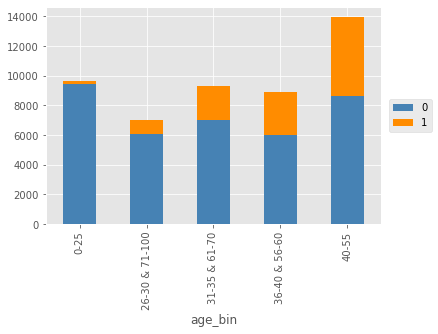

In [16]:
#Creating plot for age
create_plot("age_bin")

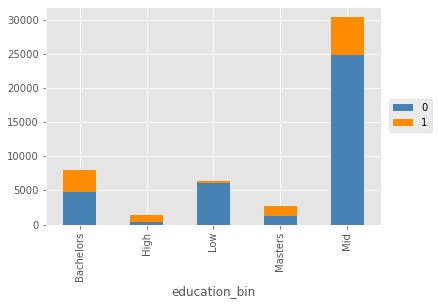

In [17]:
create_plot("education_bin")

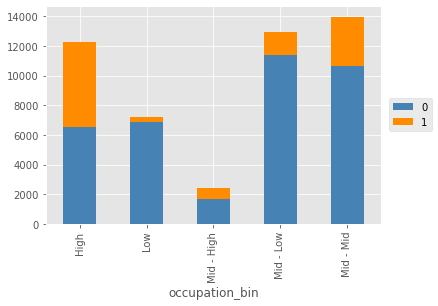

In [18]:
create_plot("occupation_bin")

Part 3: Creating Decision Tree Algorithm

In [19]:
#Creating testing and training data (One Hot Encoding)
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
import time

#Initializing Start Time
start_time = time.time()

train1 = df_copy1[df_copy1["flag"] == "train"].drop(["flag","education_num_bin"], axis = 1)
test1 =  df_copy1[df_copy1["flag"] == "test"].drop(["flag","education_num_bin"], axis = 1)
X_train1 = train1.drop("y", axis = 1)
y_train1 = train1["y"]
X_test1 = test1.drop("y", axis = 1)
y_test1 = test1["y"]

#Create Dummies
encoder = OneHotEncoder()
X_train1 = encoder.fit_transform(X_train1).toarray()
X_test1 = encoder.fit_transform(X_test1).toarray()


dtree = DecisionTreeClassifier(max_depth = 5, random_state = 23,
                               max_features=None, min_samples_leaf = 15)
dtree.fit(X_train1, y_train1)

#Initializing End time
end_time = time.time()

#Calculating the time tor trian the model
training_time = end_time - start_time

print("Training time: {:.2f} seconds".format(training_time))

Training time: 0.13 seconds


In [20]:
#Creating testing and training data (Label Encoding)
train = df_new[df_new["flag"] == 1]
test = df_new[df_new["flag"] == 0]

#Preparing X and y variables for machine Learning

In [21]:
X_train = train.drop(["y"], axis = 1)
X_test = test.drop(["y"], axis = 1)

In [22]:
y_train = train["y"]
y_test = test["y"]
print(y_train.head())

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64


Creating the decision tree

In [23]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth = 10, random_state = 101,
                                max_features = None, min_samples_leaf = 15)
dtree.fit(X_train1, y_train1)
y_pred = dtree.predict(X_test1)

Part 4: Evaluate Decision Tree Performance

In [24]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_recall_fscore_support

accuracy_score(y_test1,y_pred) # accuracy score

# Printing classifier report after prediction
print(classification_report(y_test1,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90     12435
           1       0.71      0.57      0.63      3846

    accuracy                           0.84     16281
   macro avg       0.79      0.75      0.77     16281
weighted avg       0.84      0.84      0.84     16281



In [25]:
df_table = confusion_matrix(y_test1, y_pred)
print(df_table)

[[11538   897]
 [ 1656  2190]]


Part 5: Tune Decision Tree Performance

Part 5: Tune Decision Tree Performance

Q.3 Decision Tree Hyper-parameter variation vs. performance

To calculate performance of a model we can use metrics like accuracy, precision, F1 score, and AUC. The tree has hyper parameters like criteria, min sample leaf, max features, and max depth. These hyper parameters can be changed to increase the performance of the model. The relationship between Hyper-parameter and performance is not always direct. There has to be a balance. For example, preventing overfitting/underfitting while keeping performace metrics reasonably high.


In [26]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [63]:
# Run 1
accuracy_1 = []
precision_1 = []
recall_1 = []
f1_score_1 = []

criteria = ["entropy", "gini"]
for trees in criteria:
    model = DecisionTreeClassifier(criterion=trees, random_state = 101)
    model.fit(X_train1, y_train1)
    y_pred = model.predict(X_test1)
    
    accuracy = np.mean(y_test1==y_pred)
    precision = precision_score(y_test1, y_pred)
    recall = recall_score(y_test1, y_pred)
    f1 = f1_score(y_test1, y_pred)
    accuracy_1.append(accuracy.round(6))
    precision_1.append(precision.round(6))
    recall_1.append(recall.round(6))
    f1_score_1.append(f1.round(6))
print("Run 1 accuracy:", accuracy_1)
print("Run 1 precision:", precision_1)
print("Run 1 recall:", recall_1)
print("Run 1 f1:", f1_score_1)

Run 1 accuracy: [0.835637, 0.836742]
Run 1 precision: [0.688832, 0.692607]
Run 1 recall: [0.554862, 0.555382]
Run 1 f1: [0.614631, 0.61645]


In [28]:
Table1 = pd.DataFrame({"Criteria": criteria, "Accuracy": accuracy_1, "Precision": precision_1, "Recall": recall_1, "F1Score": f1_score_1})
Table1.reset_index(drop = True, inplace = True)
Table1

Criteria  Accuracy  Precision    Recall   F1Score
0  entropy  0.835637   0.688832  0.554862  0.614631
1     gini  0.836742   0.692607  0.555382  0.616450

In [64]:
#Run 2
accuracy_2 = []
precision_2 = []
recall_2 = []
f1_score_2 = []

min_sample_leaf = [5,10,15,20,25,30,35,40]
for trees in min_sample_leaf:
    model2 = DecisionTreeClassifier(criterion = "gini",min_samples_leaf=trees, random_state = 101)
    model2.fit(X_train1, y_train1)
    y_pred = model2.predict(X_test1)
    accuracy = np.mean(y_test1==y_pred)
    precision = precision_score(y_test1, y_pred)
    recall = recall_score(y_test1, y_pred)
    f1 = f1_score(y_test1, y_pred)
    accuracy_2.append(accuracy.round(6))
    precision_2.append(precision.round(6))
    recall_2.append(recall.round(6))
    f1_score_2.append(f1.round(6))
print("Run 2 accuracy:", accuracy_2)
print("Run 2 precision:", precision_2)
print("Run 2 recall:", recall_2)
print("Run 2 f1:", f1_score_2)

Run 2 accuracy: [0.839015, 0.839936, 0.841963, 0.844051, 0.843314, 0.84227, 0.843069, 0.842454]
Run 2 precision: [0.699837, 0.701692, 0.709582, 0.714755, 0.711532, 0.712434, 0.714096, 0.713287]
Run 2 recall: [0.557722, 0.560842, 0.560322, 0.565523, 0.566303, 0.557202, 0.559802, 0.556942]
Run 2 f1: [0.62075, 0.62341, 0.62618, 0.631441, 0.630665, 0.625328, 0.627605, 0.625493]


In [30]:
Table2 = pd.DataFrame({"Min Sample Leaf": min_sample_leaf, "Accuracy": accuracy_2, "Precision": precision_2, "Recall": recall_2, "F1Score": f1_score_2})
Table2.reset_index(drop = True, inplace = True)
Table2

Min Sample Leaf  Accuracy  Precision    Recall   F1Score
0                5  0.839015   0.699837  0.557722  0.620750
1               10  0.839936   0.701692  0.560842  0.623410
2               15  0.841963   0.709582  0.560322  0.626180
3               20  0.844051   0.714755  0.565523  0.631441
4               25  0.843314   0.711532  0.566303  0.630665
5               30  0.842270   0.712434  0.557202  0.625328
6               35  0.843069   0.714096  0.559802  0.627605
7               40  0.842454   0.713287  0.556942  0.625493

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


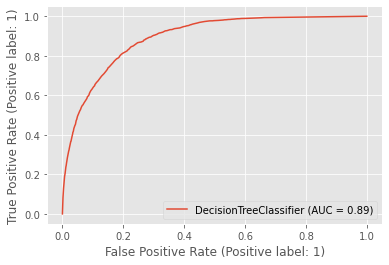

In [31]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(model2, X_test1, y_test1)

In [65]:
#Run 3
accuracy_3 = []
precision_3 = []
recall_3 = []
f1_score_3 = []

max_feature = ["auto",None, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
for trees in max_feature:
    model3 = DecisionTreeClassifier(criterion = "gini", max_features=trees, min_samples_leaf = 20, random_state = 101)
    model3.fit(X_train1, y_train1)
    y_pred = model3.predict(X_test1)
    accuracy = np.mean(y_test1==y_pred)
    precision = precision_score(y_test1, y_pred)
    recall = recall_score(y_test1, y_pred)
    f1 = f1_score(y_test1, y_pred)
    accuracy_3.append(accuracy.round(6))
    precision_3.append(precision.round(6))
    recall_3.append(recall.round(6))
    f1_score_3.append(f1.round(6))
print("Run 3 accuracy:", accuracy_3)
print("Run 3 precision:", precision_3)
print("Run 3 recall:", recall_3)
print("Run 3 f1:", f1_score_3)

Run 3 accuracy: [0.8349, 0.844051, 0.838462, 0.839076, 0.841472, 0.843499, 0.845464, 0.844113]
Run 3 precision: [0.684043, 0.714755, 0.706662, 0.700196, 0.704494, 0.715186, 0.719183, 0.715557]
Run 3 recall: [0.559542, 0.565523, 0.540562, 0.557462, 0.566563, 0.560842, 0.567343, 0.564483]
Run 3 f1: [0.615561, 0.631441, 0.612552, 0.62073, 0.628044, 0.62868, 0.634302, 0.631105]


In [33]:
Table3 = pd.DataFrame({"Max Features": max_feature, "Accuracy": accuracy_3, "Precision": precision_3, "Recall": recall_3, "F1Score": f1_score_3})
Table3.reset_index(drop = True, inplace = True)
Table3

Max Features  Accuracy  Precision    Recall   F1Score
0         auto  0.834900   0.684043  0.559542  0.615561
1         None  0.844051   0.714755  0.565523  0.631441
2          0.3  0.838462   0.706662  0.540562  0.612552
3          0.4  0.839076   0.700196  0.557462  0.620730
4          0.5  0.841472   0.704494  0.566563  0.628044
5          0.6  0.843499   0.715186  0.560842  0.628680
6          0.7  0.845464   0.719183  0.567343  0.634302
7          0.8  0.844113   0.715557  0.564483  0.631105

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


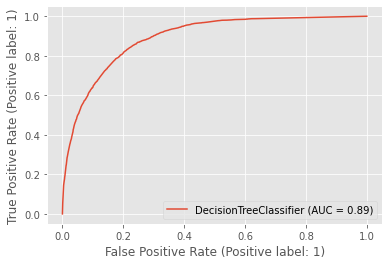

In [34]:
plot_roc_curve(model3, X_test1, y_test1)

In [66]:
#Run 4
accuracy_4 = []
precision_4 = []
recall_4 = []
f1_score_4 = []
max_depth_options = [2,4,6,8,10,12,14,16]
for trees in max_depth_options:
    model4 = DecisionTreeClassifier(criterion = "gini", max_depth = trees, max_features = 0.4, min_samples_leaf = 20, random_state = 101)
    model4.fit(X_train1, y_train1)
    y_pred = model4.predict(X_test1)
    accuracy = np.mean(y_test1==y_pred)
    precision = precision_score(y_test1, y_pred)
    recall = recall_score(y_test1, y_pred)
    f1 = f1_score(y_test1, y_pred)
    accuracy_4.append(accuracy.round(6))
    precision_4.append(precision.round(6))
    recall_4.append(recall.round(6))
    f1_score_4.append(f1.round(6))
print("Run 4 accuracy:", accuracy_4)
print("Run 4 precision:", precision_4)
print("Run 4 recall:", recall_4)
print("Run 4 f1:", f1_score_4)

Run 4 accuracy: [0.763774, 0.827099, 0.830723, 0.834838, 0.839629, 0.84184, 0.84098, 0.839506]
Run 4 precision: [0.0, 0.674924, 0.706127, 0.681975, 0.699129, 0.710779, 0.706675, 0.706394]
Run 4 recall: [0.0, 0.517161, 0.485439, 0.563703, 0.563703, 0.557202, 0.558762, 0.548622]
Run 4 f1: [0.0, 0.585603, 0.575347, 0.617224, 0.624154, 0.62469, 0.624074, 0.617591]


/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
Table4 = pd.DataFrame({"Max Depth": max_depth_options, "Accuracy": accuracy_4, "Precision": precision_4, "Recall": recall_4, "F1Score": f1_score_4})
Table4.reset_index(drop = True, inplace = True)
Table4

Max Depth  Accuracy  Precision    Recall   F1Score
0          2  0.763774   0.000000  0.000000  0.000000
1          4  0.827099   0.674924  0.517161  0.585603
2          6  0.830723   0.706127  0.485439  0.575347
3          8  0.834838   0.681975  0.563703  0.617224
4         10  0.839629   0.699129  0.563703  0.624154
5         12  0.841840   0.710779  0.557202  0.624690
6         14  0.840980   0.706675  0.558762  0.624074
7         16  0.839506   0.706394  0.548622  0.617591

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


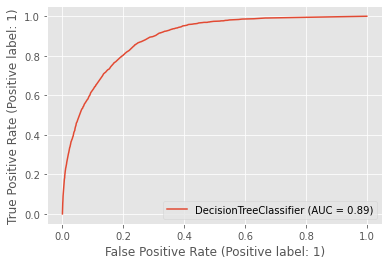

In [37]:
plot_roc_curve(model4, X_test1, y_test1)

In [67]:
#Best Model
accuracy_5 = []
precision_5 = []
recall_5 = []
f1_score_5 = []

model5 = DecisionTreeClassifier(criterion = "gini", max_depth = 12, max_features = 0.7, min_samples_leaf = 20, random_state = 101)
model5.fit(X_train1, y_train1)
y_pred = model5.predict(X_test1)
accuracy = np.mean(y_test1==y_pred)
precision = precision_score(y_test1, y_pred)
recall = recall_score(y_test1, y_pred)
f1 = f1_score(y_test1, y_pred)
accuracy_5.append(accuracy.round(6))
precision_5.append(precision.round(6))
recall_5.append(recall.round(6))
f1_score_5.append(f1.round(6))
print("Run 5 accuracy:", accuracy_5)
print("Run 5 precision:", precision_5)
print("Run 5 recall:", recall_5)
print("Run 5 f1:", f1_score_5)

Run 5 accuracy: [0.843253]
Run 5 precision: [0.710065]
Run 5 recall: [0.568643]
Run 5 f1: [0.631533]


In [39]:
Table5 = pd.DataFrame({ "Accuracy": accuracy_5, "Precision": precision_5, "Recall": recall_5, "F1Score": f1_score_5})
Table5.reset_index(drop = True, inplace = True)
Table5

Accuracy  Precision    Recall   F1Score
0  0.843253   0.710065  0.568643  0.631533

Part 6: Visialize Best Decision Tree Using GraphViz

In [40]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

In [41]:
dot_data = StringIO()
plt.figure(figsize=(50,40))

export_graphviz(model5, out_file=dot_data,
                filled = True, rounded = True,
                special_characters = True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

graph.write_pdf("tree.pdf")

Image(graph.create_png())

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.997473 to fit



<Figure size 3600x2880 with 0 Axes>

Part 7: Conclusion

Q.4 How long was your total run time to train the best model?

As shown from the time in part 3 it took 0.14 seconds to train the decision tree model

Q.5 Did you find the BEST TREE?

Yes, I was able to find the best tree

Q.6 Write your observations from the visualization of the best tree

To first specify the criteria used for the best performing tree is Gini. The min sample leaf is 20, the max feature value is 0.4, and the max_depth is a value of 12.   

Q.7 Will this Tree “overfit”?

A model is said to overfit when it fits training data too well, to the extent that it starts to perform poorly test data. Overfitting can occur when the model is too complex or too flexible relative to the amount of training data available.

With the current parameters, the max_depth hyperparameter is set to 12, which may be high enough to allow the model to learn of the training data, especially if the training set is small. The min_samples_leaf hyperparameter is also set to a low value of 20, which may allow the model to fit the training data more closely. The max_features hyperparameter is set to 0.7, which means that the model will consider 70% of the available features at each split. If the original data has many features, this may also contribute to overfitting.

Part 8: Prediction using trained decision tree model

In [69]:
from sklearn.preprocessing import OneHotEncoder


import pandas as pd

# Load the model from file
model = model5

# Create a single-record dataframe for the new individual
new_data = pd.DataFrame({
    'age': [58],
    'workclass_ Federal-gov': [0],
    'workclass_ Local-gov': [0],
    'workclass_ Never-worked': [0],
    'workclass_ Private': [1],
    'workclass_ Self-emp-inc': [0],
    'workclass_ Self-emp-not-inc': [0],
    'workclass_ State-gov': [0],
    'workclass_ Without-pay': [0],
    'education_ 10th': [0],
    'education_ 11th': [0],
    'education_ 12th': [1],
    'education_ 1st-4th': [0],
    'education_ 5th-6th': [0],
    'education_ 7th-8th': [0],
    'education_ 9th': [0],
    'education_ Assoc-acdm': [0],
    'education_ Assoc-voc': [0],
    'education_ Bachelors': [0],
    'education_ Doctorate': [0],
    'education_ HS-grad': [1],
    'education_ Masters': [0],
    'education_ Preschool': [0],
    'education_ Prof-school': [0],
    'education_ Some-college': [0],
    'marital-status_ Divorced': [0],
    'marital-status_ Married-AF-spouse': [0],
    'marital-status_ Married-civ-spouse': [1],
    'marital-status_ Married-spouse-absent': [0],
    'marital-status_ Never-married': [0],
    'marital-status_ Separated': [0]
    
})

prediction = model.predict(new_data)
print(prediction)

[0]


/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [62]:
#Checking the probability of the prediction
y_prob = model5.predict_proba(X_test1)
print(y_prob)

[[1.         0.        ]
 [0.67576792 0.32423208]
 [0.7        0.3       ]
 ...
 [0.21818182 0.78181818]
 [0.975      0.025     ]
 [0.26666667 0.73333333]]


Q.8 What is the probability that your prediction for this person is correct?

The probabilty that the prediction is correct is 78.18%. 